In [1]:
import numpy as np                     
import pandas as pd

pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

<ipython-input-1-cf72e7528d44>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)           # To display all the data in each column


In [4]:
sms = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/spam.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [5]:
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
sms = sms.rename(columns={"v1":"label", "v2":"sms"})

In [6]:
sms.tail()

,label,sms
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free
5571,ham,Rofl. Its true to its name


In [7]:
sms.label.value_counts()

ham     4825
spam    747 
Name: label, dtype: int64

In [8]:
sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
sms['length'] = sms['sms'].apply(len)
sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61


<AxesSubplot:ylabel='Frequency'>

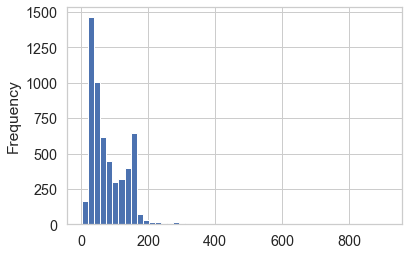

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sms['length'].plot(bins=50, kind='hist')

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

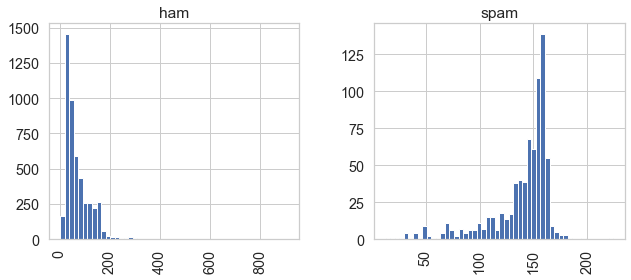

In [11]:
sms.hist(column='length', by='label', bins=50,figsize=(10,4))

In [12]:
sms.loc[:,'label'] = sms.label.map({'ham':0, 'spam':1})
print(sms.shape)
sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives around here though",61


Step 1: __Convert all strings to their lower case form.__

In [13]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)


['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


Step 2: Removing all punctuations

In [14]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

Step 3: Tokenization

In [15]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

Step 4: Count frequencies

In [16]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


### Implementing Bag of Words in scikit-learn

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [18]:
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

In [19]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [20]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


### Extract the dependent variables to create a dataframe X.

In [21]:
X = pd.DataFrame()
def generate():
    X = sms['sms']
    return X
X = generate()

In [22]:
X.head()

0    Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                            
1    Ok lar... Joking wif u oni...                                                                                                                              
2    Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3    U dun say so early hor... U c already then say...                                                                                                          
4    Nah I don't think he goes to usf, he lives around here though                                                                                              
Name: sms, dtype: object

###  Extract the independent variable into a dataframe 'y' for model prediction.

In [23]:
y = pd.DataFrame()
def generate():
    y = sms['label']
    return y
y = generate()

### Split X and y into train and test dataset with test_size = 0.20, random_state=0.¶

In [24]:
from sklearn.model_selection import train_test_split
def generate():
    return train_test_split(sms['sms'], sms['label'], test_size=0.20, random_state=0 )
X_train, X_test, y_train, y_test = generate()

In [27]:
print(X_train.shape)
print(y_train.shape)

(4457,)
(4457,)


In [28]:
print(X_test.shape)
print(y_test.shape)

(1115,)
(1115,)


Instantiate the CountVectorizer method

In [29]:
count_vector = CountVectorizer()

In [30]:
training_data = count_vector.fit_transform(X_train)

In [31]:
testing_data = count_vector.transform(X_test)

## Naive Bayes Machine Learning model

In [33]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [34]:
predictions = naive_bayes.predict(testing_data)

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))

Accuracy score: 0.9874439461883409


###  Model evaluation 

- using confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
matrix = pd.DataFrame()

matrix = pd.DataFrame(confusion_matrix(y_test, predictions))
matrix.index = ['Actual ham','Actual spam']
matrix.columns = ['Predicted ham','Predicted spam']
print('\n\n confusion matrix for model is\n\n',matrix)



 confusion matrix for model is

              Predicted ham  Predicted spam
Actual ham   947            2             
Actual spam  12             154           


- Precision score

In [37]:
from sklearn.metrics import precision_score
print('Precision score for test data is:', precision_score(y_test,predictions))

Precision score for test data is: 0.9871794871794872


- Recall score

In [38]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,predictions)
print('Recall score for test data is:', recall)

Recall score for test data is: 0.927710843373494


- F1-score

In [39]:
from sklearn.metrics import f1_score
print('F1_score for test data is:', f1_score(y_test,predictions))

F1_score for test data is: 0.9565217391304347
